# Regresión Lineal 

In [162]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [163]:
import import_ipynb

In [164]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

In [165]:
import AnalisisExploratorio as liga

In [166]:
data = pd.read_csv('Info_para_usar\LaLiga Complete Matches 1995-2020.csv')

In [167]:
X = []
y = []

In [168]:
numero = 0 
BARvictories = 0 
BARdefeats = 0
BARdraw = 0
while(numero < 380):
    if(data.HomeTeam[8524 + numero] == 'Barcelona'):
        if(data.FTR[8524 + numero] == 'H'):
            BARvictories += 3
            BARdefeats += 0
            X.append(BARvictories)
            y.append(BARdefeats)
        elif(data.FTR[8524 + numero] == 'D'):
            BARvictories += 1
            BARdefeats += 2
            X.append(BARvictories)
            y.append(BARdefeats)
        elif(data.FTR[8524 + numero] == 'A'):
            BARdefeats += 3
            BARvictories += 0
            y.append(BARdefeats)
            X.append(BARvictories)
    numero += 1
numero = 0 
while(numero < 380):
    if(data.HomeTeam[8904 + numero] == 'Barcelona'):
        if(data.FTR[8904 + numero] == 'H'):
            BARvictories += 3
            BARdefeats += 0
            X.append(BARvictories)
            y.append(BARdefeats)
        elif(data.FTR[8904 + numero] == 'D'):
            BARvictories += 1
            BARdefeats += 2
            X.append(BARvictories)
            y.append(BARdefeats)
        elif(data.FTR[8904 + numero] == 'A'):
            BARdefeats += 3
            BARvictories += 0
            y.append(BARdefeats)
            X.append(BARvictories)
    numero += 1
numero = 0 
while(numero < 270):
    if(data.HomeTeam[9284 + numero] == 'Barcelona'):
        if(data.FTR[9284 + numero] == 'H'):
            BARvictories += 3
            BARdefeats += 0
            X.append(BARvictories)
            y.append(BARdefeats)
        elif(data.FTR[9284 + numero] == 'D'):
            BARvictories += 1
            BARdefeats += 2
            X.append(BARvictories)
            y.append(BARdefeats)
        elif(data.FTR[9284 + numero] == 'A'):
            BARdefeats += 3
            BARvictories += 0
            y.append(BARdefeats)
            X.append(BARvictories)
    numero += 1
    
print(X)
print(y)

[3, 6, 9, 12, 15, 18, 19, 22, 25, 28, 29, 32, 35, 38, 41, 44, 45, 48, 51, 54, 57, 58, 59, 62, 65, 65, 68, 71, 74, 77, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 121, 124, 127, 130, 133, 136, 139]
[0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 8, 10, 10, 10, 13, 13, 13, 13, 13, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 17, 17, 17, 17, 17, 17]


In [169]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [170]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(np.array(X_train).reshape(-1,1))
X_test = sc_X.transform(np.array(X_test).reshape(-1,1))

In [171]:
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [172]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [173]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

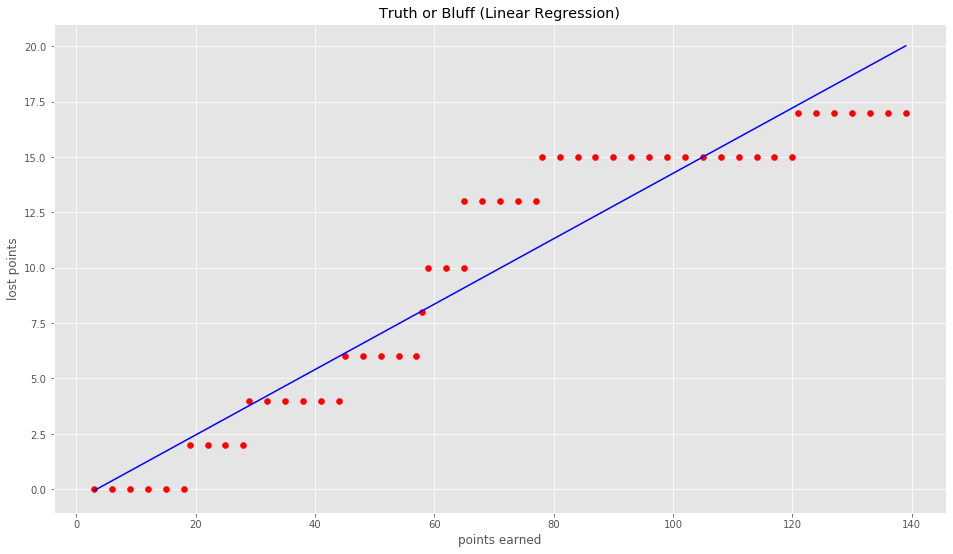

In [174]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('points earned')
plt.ylabel('lost points')
plt.show()

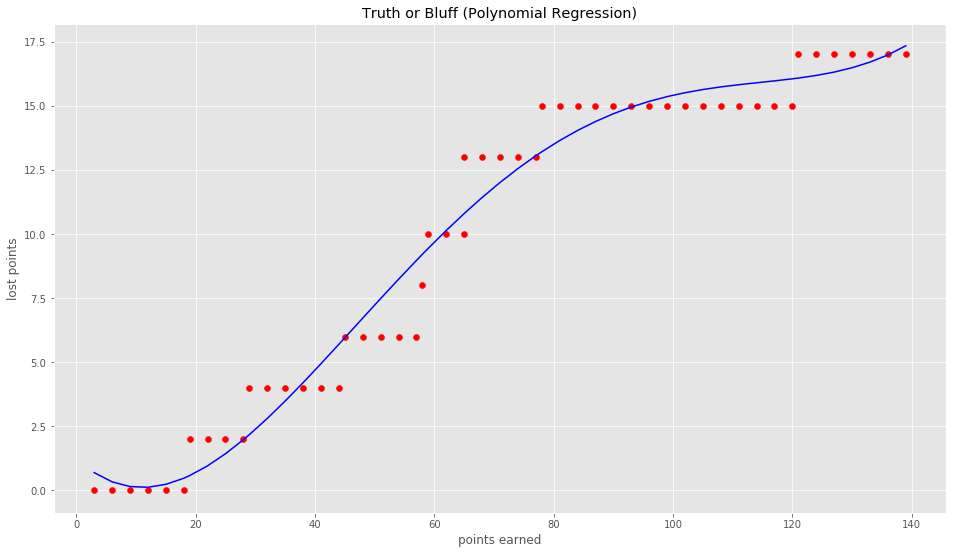

In [175]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('points earned')
plt.ylabel('lost points')
plt.show()

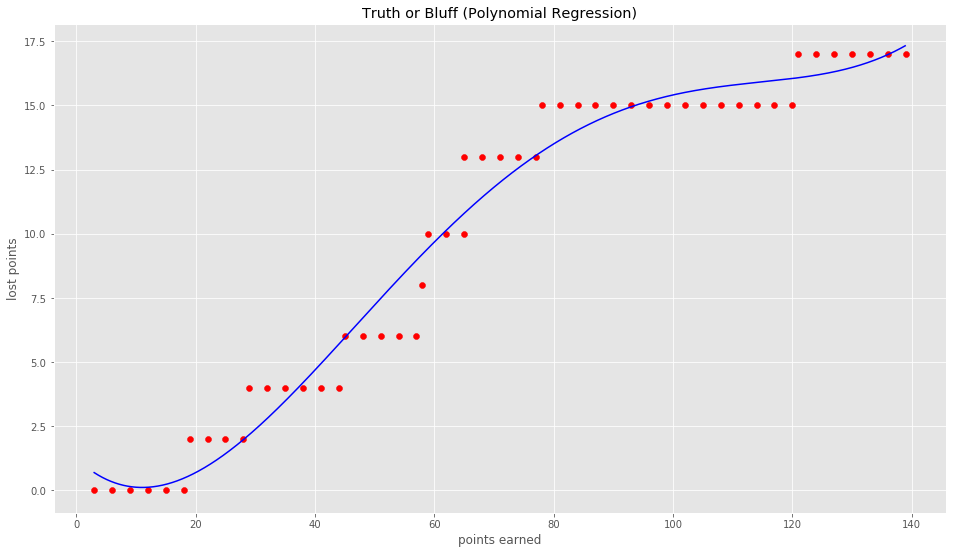

In [176]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('points earned')
plt.ylabel('lost points')
plt.show()

In [177]:
# Predicting a new result with Linear Regression
lin_reg.predict(np.array(6.5).reshape(-1,1))

array([[0.4584293]])

In [178]:
# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform(np.array(6.5).reshape(-1,1)))

array([[0.29201287]])